# Task 6--K-Nearest Neighbors (KNN) Classification
#### Hetal Patel Dholu

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [118]:
#import data
iris = pd.read_csv("iris.csv")

In [119]:
iris.shape

(150, 6)

In [120]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [121]:
Species_names =  iris['Species'].value_counts()
display(Species_names)

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [122]:
# encoding species
le=LabelEncoder()
iris['Species']=le.fit_transform(iris['Species'])

In [123]:
iris['Species'].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [124]:
#duplicate check
iris.duplicated().sum()#no duplicate present

np.int64(0)

In [125]:
#The data is complete so no need for imputation
#removing Id as its not required
iris.drop('Id',axis=1,inplace=True)

In [126]:
#Modeling using KNN classification
x=iris.drop('Species',axis=1)
y=iris['Species']

In [127]:
#train test split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)
#scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


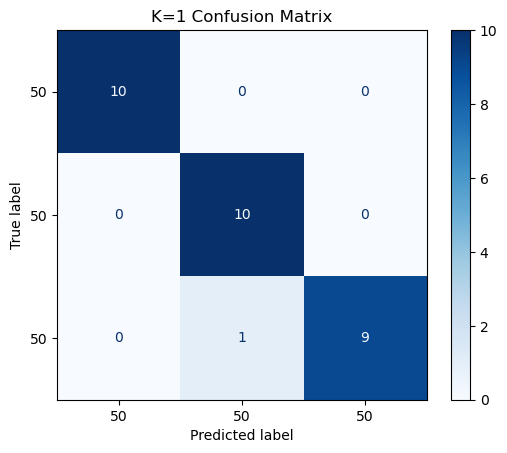

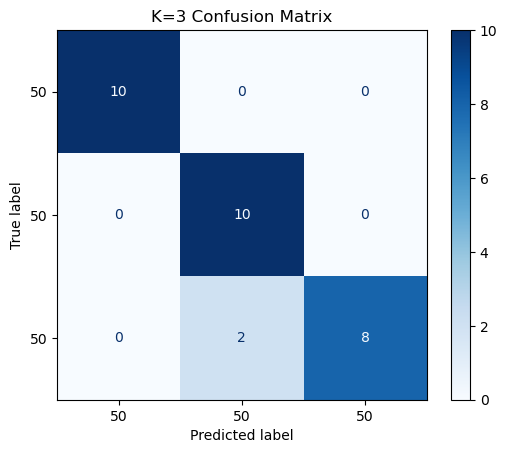

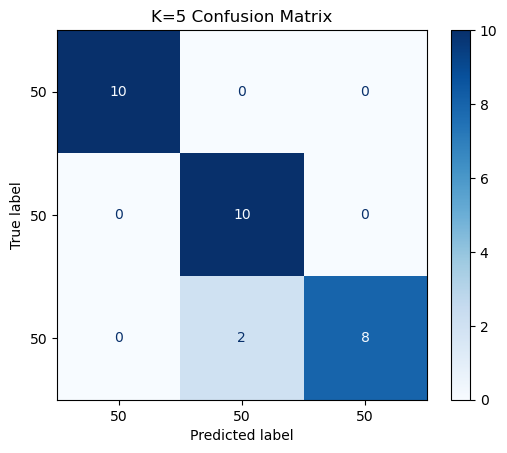

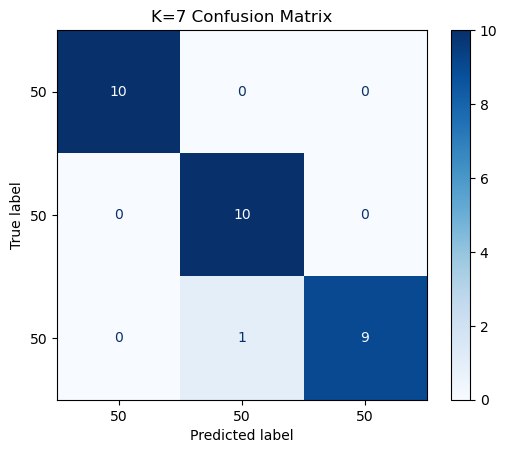

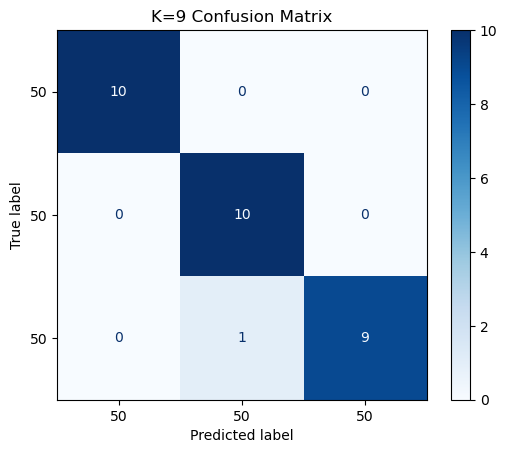

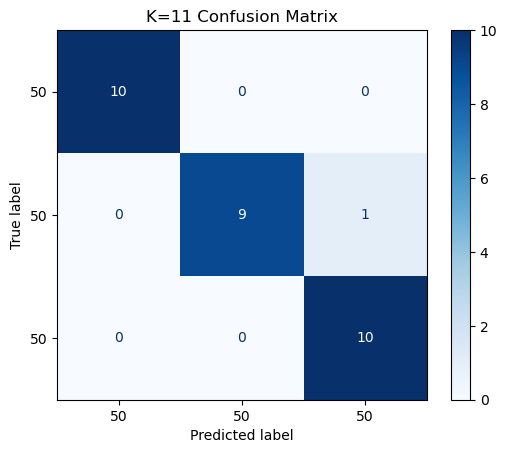

Accuracy score for k = 1 is 0.9666666666666667
Accuracy score for k = 3 is 0.9333333333333333
Accuracy score for k = 5 is 0.9333333333333333
Accuracy score for k = 7 is 0.9666666666666667
Accuracy score for k = 9 is 0.9666666666666667
Accuracy score for k = 11 is 0.9666666666666667


In [128]:
k_values = [1,3,5,7,9,11]
k_scores = {}
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    # Confusion Matrix
    k_scores[k]=acc
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=Species_names)
    disp.plot(cmap="Blues")
    plt.title(f"K={k} Confusion Matrix")
    plt.show()

for i in k_values:
    print(f"Accuracy score for k = {i} is {k_scores[i]}")

## Visualization of decision Boundary

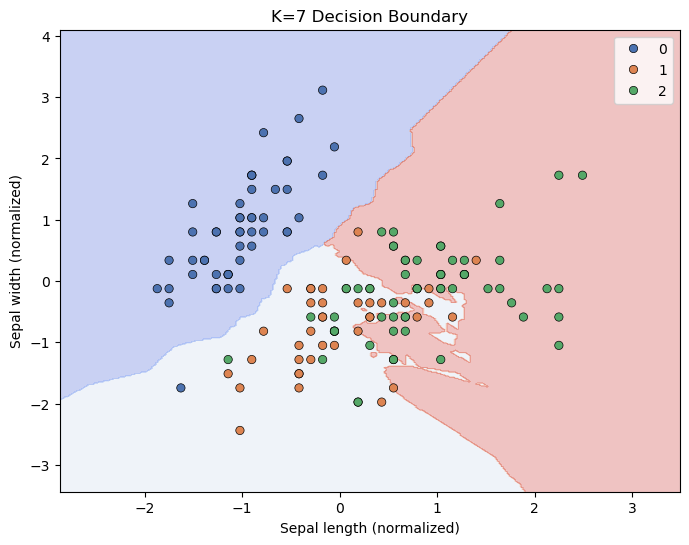

In [129]:
# Use only first two features for visualization
X_vis = iris.iloc[:, [0, 1]].values   # SepalLengthCm, SepalWidthCm
y_vis = iris['Species']

# Encode labels
le = LabelEncoder()
y_vis = le.fit_transform(y_vis)

# Normalize
scaler = StandardScaler()
X_vis = scaler.fit_transform(X_vis)

# Train/test split (for visualization only)
x_train_vis, x_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y_vis, test_size=0.3, random_state=42
)

# Train KNN on 2D data
best_k = 7
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train_vis, y_train_vis)

# Create meshgrid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
sns.scatterplot(x=X_vis[:, 0], y=X_vis[:, 1], hue=le.inverse_transform(y_vis),
                palette="deep", edgecolor="k")
plt.title(f"K={best_k} Decision Boundary")
plt.xlabel("Sepal length (normalized)")
plt.ylabel("Sepal width (normalized)")
plt.show()


1. How does the KNN algorithm work?
KNN (K-Nearest Neighbors) is a lazy, non-parametric algorithm used for classification and regression.
Steps:
Store all training data.
For a new data point, calculate the distance (e.g., Euclidean) to all training points.
Select the K closest neighbors.
For classification: assign the majority class among neighbors.
For regression: take the average (or weighted average) of neighbors’ values.

2. How do you choose the right K?
K determines how many neighbors influence the prediction.
Rules of thumb:
Small K → sensitive to noise, can overfit.
Large K → smoother predictions, may underfit.
Use cross-validation to find the K with the lowest error.
Commonly, odd K is chosen in binary classification to avoid ties.

3. Why is normalization important in KNN?
KNN uses distance metrics, so features with larger scales dominate.
Example: age (0–100) vs. income (0–100,000) → income dominates Euclidean distance.
Normalization/standardization ensures all features contribute equally.

4. What is the time complexity of KNN?
Training: O(1) → just stores data (lazy learner).
Prediction: O(n × d) per query (n = number of training points, d = number of features).
Can be improved with KD-Trees or Ball Trees for low-dimensional data.

5. What are pros and cons of KNN?
Pros:
Simple, easy to understand and implement.
No assumptions about data distribution.
Can be used for classification and regression.
Cons:
Slow for large datasets (high n or d).
Sensitive to irrelevant features and noisy data.
Memory-intensive (stores all training data).

6. Is KNN sensitive to noise?
Yes. Outliers or mislabeled points can mislead predictions, especially if K is small.
Using larger K or distance weighting can reduce sensitivity.

7. How does KNN handle multi-class problems?
Works naturally with multi-class classification.
Finds K nearest neighbors and votes for the most frequent class among neighbors.
Distance weighting can improve performance in multi-class cases.

8. What’s the role of distance metrics in KNN?
Distance metric defines “closeness” of points.
Common metrics:
Euclidean → straight-line distance (most common).
Manhattan → sum of absolute differences.
Minkowski → general form of Euclidean/Manhattan.
Hamming → for categorical variables.
Choosing the right metric affects accuracy and performance.